In [53]:
import pandas as pd


In [54]:
Claimants_df=pd.read_csv("claimants.csv")
Claimants_df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [55]:
Claimants_df.shape


(1340, 7)

In [56]:
Claimants_df.isnull().sum()


CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

# DATA Preprocessing

In [57]:
Claimants_df["CLMSEX"]=Claimants_df["CLMSEX"].fillna(1)
Claimants_df["CLMINSUR"]=Claimants_df["CLMINSUR"].fillna(1)
Claimants_df["SEATBELT"]=Claimants_df["SEATBELT"].fillna(1)
Claimants_df["CLMAGE"].mean() 
Claimants_df["CLMAGE"]=Claimants_df["CLMAGE"].fillna(Claimants_df["CLMAGE"].mean())# if the no of data increases, the mean will be caluculated automatically and filled

In [58]:
Claimants_df.isnull().sum()


CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [59]:
x= Claimants_df.drop(labels=["ATTORNEY","CASENUM"],axis=1)
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [60]:
y=Claimants_df[["ATTORNEY"]]
y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1335,1
1336,0
1337,1
1338,0


# Data Validation technique
* separated into x and y

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y,  train_size=0.80,random_state=45,
    shuffle=True)

In [63]:
X_train.shape #80% od data used for training

(1072, 5)

In [64]:
X_test.shape #20% is used for testing

(268, 5)

# Model building

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model=DecisionTreeClassifier() 


* A hyperparameter is a configuration set before the training process begins. It is not learned from the data. Instead, it controls how the learning process works *

# Model Training

In [89]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Model Prediction

In [68]:
y_train_pred=model.predict(X_train)

In [69]:
y_test_pred=model.predict(X_test)

# Model Testing

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_train,y_train_pred)

0.9944029850746269

In [72]:
accuracy_score(y_test,y_test_pred)

0.6977611940298507

## Overfitting

In [73]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

[Text(0.45970589201261164, 0.9821428571428571, 'x[4] <= 0.988\ngini = 0.5\nsamples = 1072\nvalue = [552, 520]'),
 Text(0.14211935102469783, 0.9464285714285714, 'x[3] <= 5.5\ngini = 0.391\nsamples = 492\nvalue = [131, 361]'),
 Text(0.3009126215186547, 0.9642857142857142, 'True  '),
 Text(0.040987913820283765, 0.9107142857142857, 'x[4] <= 0.592\ngini = 0.499\nsamples = 79\nvalue = [38, 41]'),
 Text(0.023121387283236993, 0.875, 'x[4] <= 0.012\ngini = 0.48\nsamples = 65\nvalue = [26, 39]'),
 Text(0.018917498686284815, 0.8392857142857143, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.027325275880189175, 0.8392857142857143, 'x[4] <= 0.073\ngini = 0.495\nsamples = 58\nvalue = [26, 32]'),
 Text(0.012611665790856543, 0.8035714285714286, 'x[3] <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.008407777193904361, 0.7678571428571429, 'x[4] <= 0.015\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.004203888596952181, 0.7321428571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 

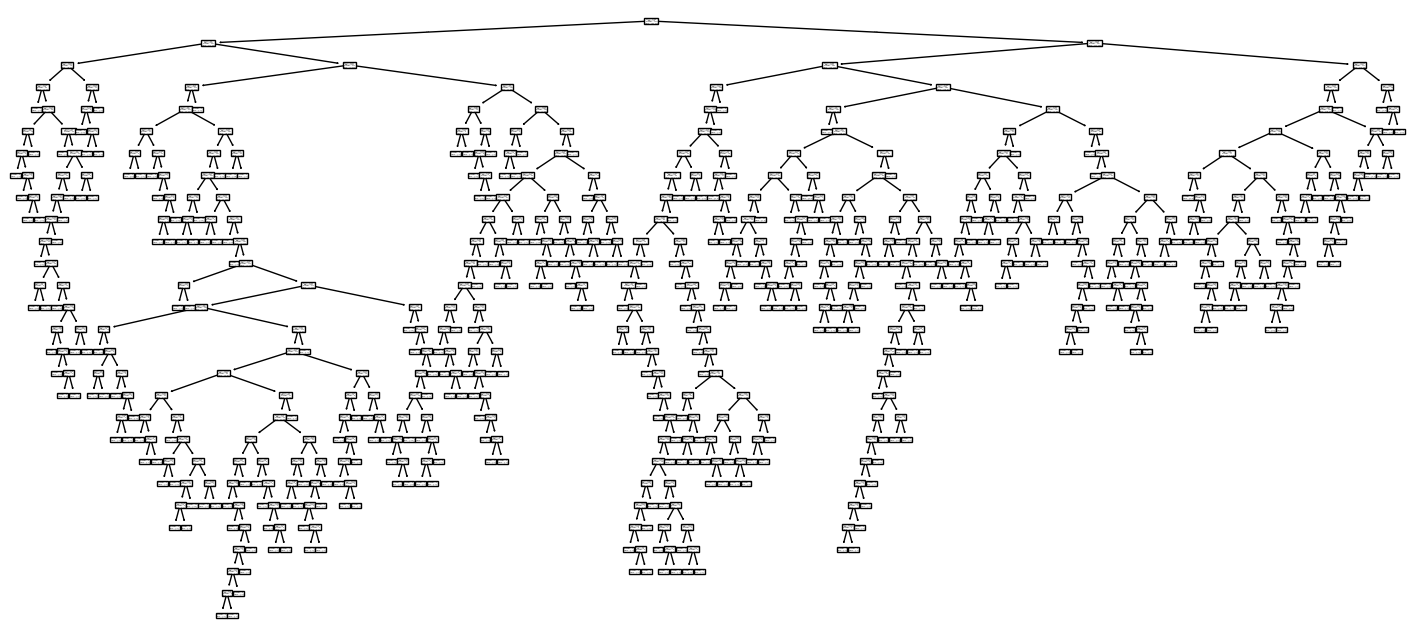

In [74]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model)

[Text(0.4883720930232558, 0.9166666666666666, 'x[4] <= 0.988\ngini = 0.5\nsamples = 1072\nvalue = [552, 520]'),
 Text(0.22674418604651161, 0.75, 'x[3] <= 5.5\ngini = 0.391\nsamples = 492\nvalue = [131, 361]'),
 Text(0.3575581395348837, 0.8333333333333333, 'True  '),
 Text(0.11627906976744186, 0.5833333333333334, 'x[4] <= 0.592\ngini = 0.499\nsamples = 79\nvalue = [38, 41]'),
 Text(0.046511627906976744, 0.4166666666666667, 'x[4] <= 0.012\ngini = 0.48\nsamples = 65\nvalue = [26, 39]'),
 Text(0.023255813953488372, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.06976744186046512, 0.25, 'x[4] <= 0.073\ngini = 0.495\nsamples = 58\nvalue = [26, 32]'),
 Text(0.046511627906976744, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09302325581395349, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.18604651162790697, 0.4166666666666667, 'x[4] <= 0.815\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.16279069767441862, 0.25, 'x[4] <= 0.713\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),

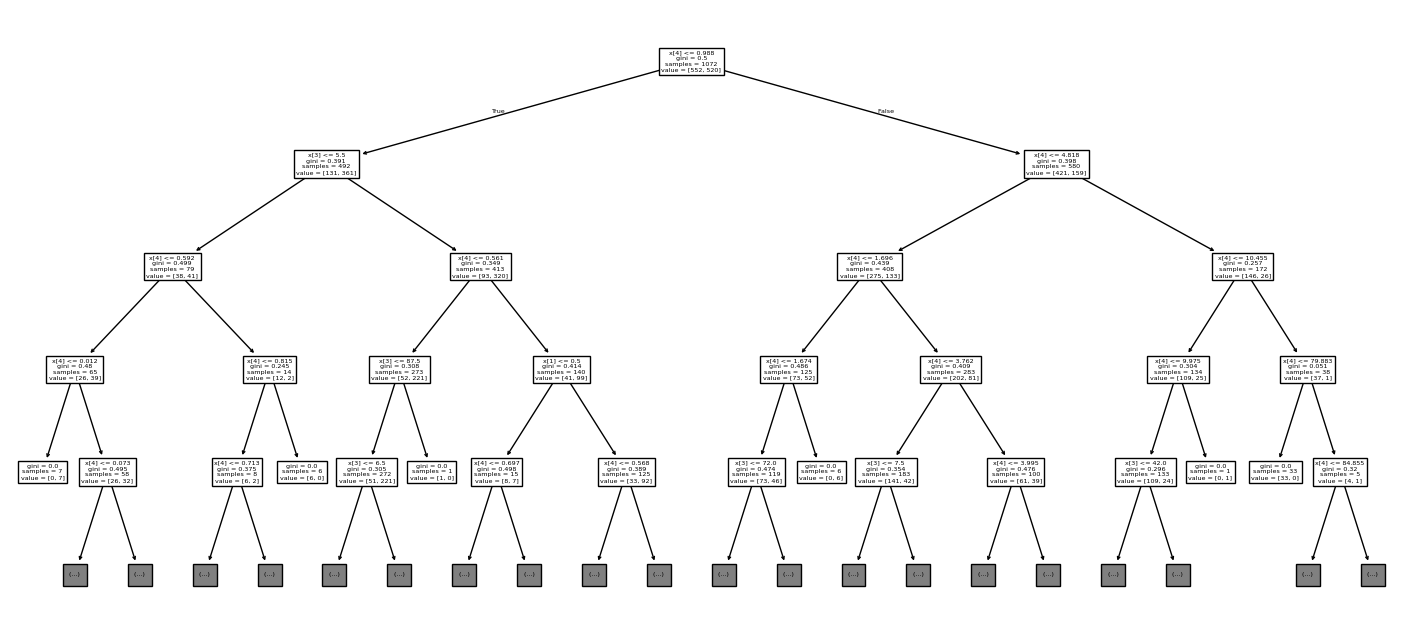

In [75]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model,max_depth=4)

## To choose best hyperparameters using grid search cv method

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid_search=GridSearchCV(estimator=model , param_grid={"criterion":["gini", "entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10]})


In [78]:
grid_search.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [79]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=1)


In [80]:
print(grid_search.error_score)

nan


In [81]:
print(grid_search.best_score_)

0.7248337317974355


# Ensemble Technique

## Bagging
* Increases stability
* Model used-Random forest(collection of multiple decision tree)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model1=RandomForestClassifier()

In [91]:
model1.fit(X_train,y_train)

C:\Users\91934\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [95]:
y_train_pred1=model1.predict(X_train)

In [96]:
y_test_pred1=model1.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_train,y_train_pred1)

0.9944029850746269

In [101]:
accuracy_score(y_test,y_test_pred1)

0.6902985074626866